### IDEA
Customer has a longer trip duration than subscriber in average.

### NULL HYPOTHESIS
The mean of trip duration by customer is less than or the same as the one by subscriber. Choose confidence interval to be at α=0.05, which means I want the probability of getting a result at least as significant as mine to be less then 5%.

#### Reading data from citibike csv file from Jan 2015

In [10]:
import pylab as pl
import pandas as pd
import numpy as np
from scipy import stats
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


In [11]:
df=pd.read_csv('201501-citibike-tripdata.csv')

#### Separating subscriber from customer for data description and testing

In [12]:
df['Dura_Subs'] = df['tripduration'][df['usertype']=='Subscriber']
df['Dura_Cust'] = df['tripduration'][df['usertype']=='Customer']

#### Plot the histogram to see the distribution of trip duration among the two groups (subscriber and customer), outliers (≥3 standard deviations) are removed for the plotting.

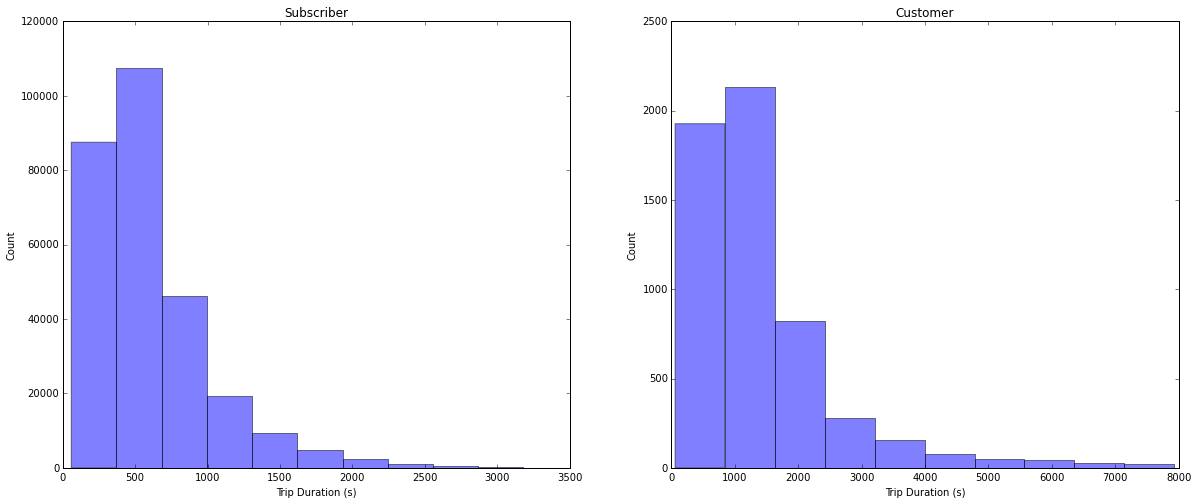

In [13]:
plt.figure(1, figsize = (20,8))
ax1 = plt.subplot(1,2,1)
ax1 = df[np.abs(df.Dura_Subs-df.Dura_Subs.mean())<=(3*df.Dura_Subs.std())].Dura_Subs.plot(kind='hist', alpha=0.5)
ax1.set_title('Subscriber')
ax1.set_ylabel('Count')
ax1.set_xlabel('Trip Duration (s)')
ax2 = plt.subplot(1,2,2)
ax2 = df[np.abs(df.Dura_Cust-df.Dura_Cust.mean())<=(3*df.Dura_Cust.std())].Dura_Cust.plot(kind='hist', alpha=0.5)
ax2.set_title('Customer')
ax2.set_ylabel('Count')
ax2.set_xlabel('Trip Duration (s)')
plt.show()

#### Now I describe the data of the two groups. Counts, mean, standard deviation and quantiles are shown as the following. It is obvious from the sample data that the mean value of trip duration by customer is signigicantly more than the one by subscriber.

In [14]:
print 'Summary Statistics for Tripduration of Subscriber'
print df.Dura_Subs.describe()
print 'Summary Statistics for Tripduration of Customer'
print df.Dura_Cust.describe()

Summary Statistics for Tripduration of Subscriber
count    279924.000000
mean        635.529058
std         848.484027
min          60.000000
25%         332.000000
50%         498.000000
75%         757.000000
max       43023.000000
Name: Dura_Subs, dtype: float64
Summary Statistics for Tripduration of Customer
count     5628.000000
mean      1589.222281
std       2114.281813
min         60.000000
25%        684.000000
50%       1148.500000
75%       1717.250000
max      40662.000000
Name: Dura_Cust, dtype: float64


#### Since the distribution of the two samples looks highly skewed by the plot, I also want to calculate the skewness and kurtosis of them. They turned to be pretty high.

In [15]:
stats.describe(df.Dura_Subs.dropna())

DescribeResult(nobs=279924, minmax=(60.0, 43023.0), mean=635.52905788714077, variance=719925.14433841861, skewness=25.56116552903761, kurtosis=977.1337451769646)

In [16]:
stats.describe(df.Dura_Cust.dropna())

DescribeResult(nobs=5628, minmax=(60.0, 40662.0), mean=1589.2222814498934, variance=4470187.5853786925, skewness=8.119015690840829, kurtosis=107.24492643256009)

#### Plot the mean values of the two groups.

[<matplotlib.text.Text at 0x10ef21650>, <matplotlib.text.Text at 0x10d5dd750>]

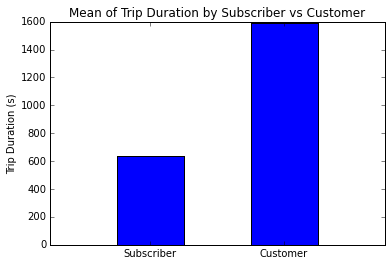

In [17]:
plt.figure(2)
ax3 = plt.subplot(1,1,1)
ax3.bar([2,6], [df.Dura_Subs.mean(), df.Dura_Cust.mean()], [2,2])
ax3.set_xlim(0,10)
ax3.set_title('Mean of Trip Duration by Subscriber vs Customer')
ax3.set_ylabel('Trip Duration (s)')
ax3.set_xticks([3,7])
ax3.set_xticklabels(('Subscriber','Customer'))

#### Since we are comparing the mean value of the two groups and we do not have the values for the population variaces, I hereby perform a two sample t-test using scipy.stats and assume the population does not have identical variances.¶

In [18]:
stats.ttest_ind(df.Dura_Cust.dropna(), df.Dura_Subs.dropna(), equal_var = False)

Ttest_indResult(statistic=33.784763439318432, pvalue=4.1308621731805612e-228)

#### The one-tailed p value is actually $1/2$ of the calculated value and it is below the confidence level of $0.05$. (a.k.a $p/2<α$ & $t>0$) Therefore, we can reject the null hypothesis and conclude that this study did provide statistical eveidence that the trip duration of customer is longer than the one of subscriber.
#### However, one must noticed that since the the skewness and kurtosis of the two samples are far beyond the acceptable levels of the normal distribution which violates the assumption that the populations from which the samples have been drawn should be normal, the conclusion we just derived from the t-test may not hold.
#### Hence, we recommend to do more nonparametric test in the future analysis.